<a href="https://colab.research.google.com/github/Alenushka2013/Coursera/blob/master/179407_2_3_data_replenishment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Поповнення даних

In [ ]:
!pip install sktime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.7/36.7 MB 46.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.4/137.4 kB 12.8 MB/s eta 0:00:00


In [ ]:
!pip install dask

In [ ]:
import pandas as pd
from sktime.utils.plotting import plot_series
df = pd.read_csv('https://raw.githubusercontent.com/Alenushka2013/Coursera/refs/heads/master/Datasets/Tesla_empty.csv')

In [ ]:
df

,Date,Open,High,Low,Close,Volume
0,07/18/2023,290.15,295.26,286.01,293.34,112434703
1,07/17/2023,286.63,292.23,283.57,290.38,131569594
2,07/14/2023,283.01,285.30,276.31,281.38,120062398
3,07/13/2023,NaN,279.45,270.60,277.90,112681508
4,07/12/2023,276.33,276.52,271.46,271.99,95672141
5,07/11/2023,268.65,270.90,266.37,269.79,91972359
6,07/10/2023,276.47,277.52,265.10,269.61,119425398
7,07/07/2023,278.43,280.78,273.77,274.43,113879203
8,07/06/2023,278.09,279.97,272.88,276.54,120707398
9,07/05/2023,278.82,283.85,277.60,282.48,131530891


Заповніть пропущені значення -  медіаною, попереднім значенням, найближчим сусідом, інтерполяцією Лагранжа

In [ ]:
#Заміна типу object на datetime
df['Date'] = pd.to_datetime(df['Date'], format = "%m/%d/%Y")

In [ ]:
# Зміна індексів на дату
df = df.set_index("Date")

In [ ]:
df.sort_index(inplace  = True)

In [ ]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2023-06-20,261.50,274.75,261.12,274.45,165611203
2023-06-21,275.13,276.99,257.78,259.46,211797109
2023-06-22,250.77,265.00,248.25,264.61,166875906
2023-06-23,259.29,262.45,252.80,256.60,177460797
2023-06-26,250.07,258.37,240.70,241.05,179990594
2023-06-27,243.24,250.39,240.85,250.21,164968188
2023-06-28,249.70,259.88,248.89,256.24,159770797
2023-06-29,258.03,260.74,253.61,257.50,131283406
2023-06-30,260.60,264.45,259.89,261.77,112620797


(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Open'>)

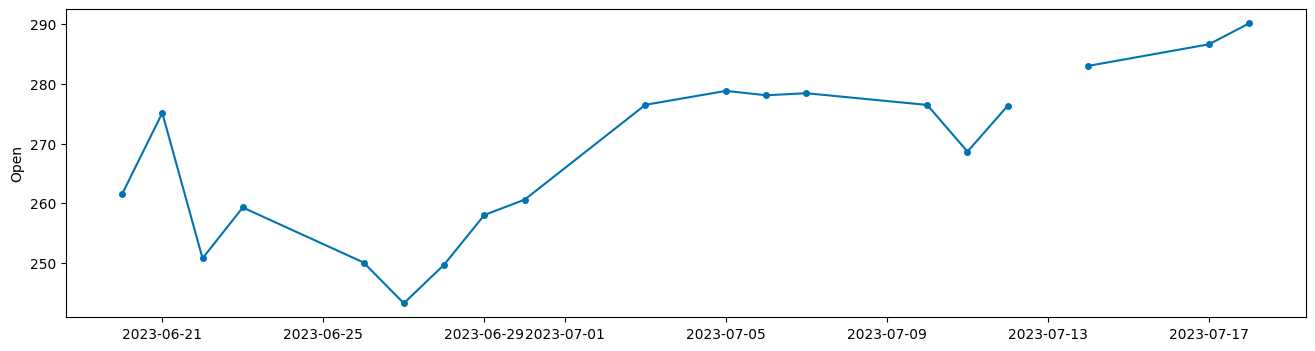

In [ ]:
plot_series(df['Open'])

In [ ]:
# Загальна кількіть пропущених значень
df['Open'].isna().sum()

1

In [ ]:
# Видалення пропущеного знаяення
df['Open'].dropna()

,Open
2023-06-20,261.50
2023-06-21,275.13
2023-06-22,250.77
2023-06-23,259.29
2023-06-26,250.07
2023-06-27,243.24
2023-06-28,249.70
2023-06-29,258.03
2023-06-30,260.60
2023-07-03,276.49


In [ ]:
# Заміна пропущенного значення медіаною
df['Open'].fillna(df['Open'].median())

,Open
2023-06-20,261.50
2023-06-21,275.13
2023-06-22,250.77
2023-06-23,259.29
2023-06-26,250.07
2023-06-27,243.24
2023-06-28,249.70
2023-06-29,258.03
2023-06-30,260.60
2023-07-03,276.49


In [ ]:
# Заміна пропущенного значення модою
df['Open'].mode()[0]

243.24

<ipython-input-66-52e532907612>:20: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ax4.plot(df['Open'].fillna(method = 'bfill'))
<ipython-input-66-52e532907612>:24: FutureWarning: Series.interpolate with method=pad is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ax5.plot(df['Open'].interpolate(method = 'pad', limit = 1))


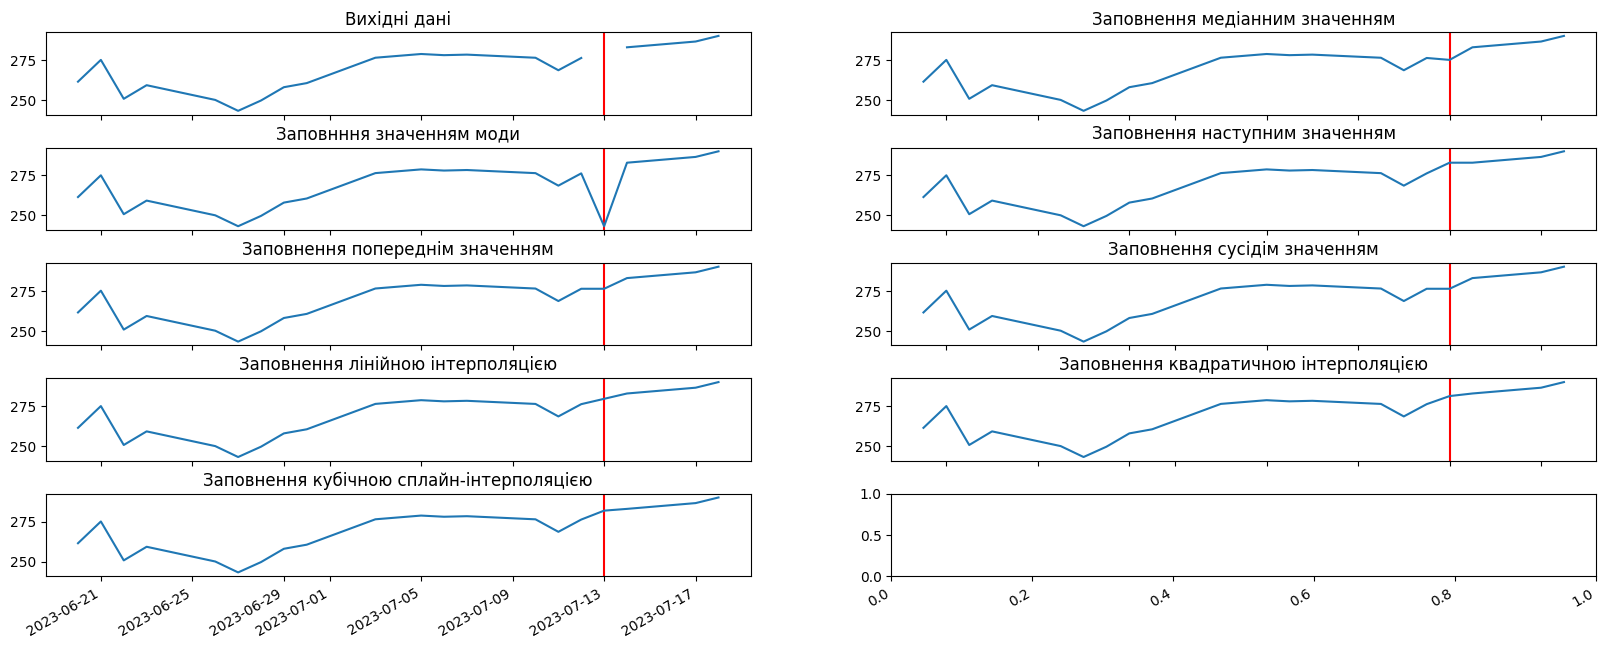

In [ ]:

import matplotlib.pyplot as plt
import datetime
plt.rcParams['figure.figsize'] = (20, 8)
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10)) = plt.subplots(5, 2)

ax1.set_title('Вихідні дані')
ax1.axvline(x = datetime.datetime.strptime('13072023', '%d%m%Y').date(), color = 'r')
ax1.plot(df['Open'])

ax2.set_title('Заповнення медіанним значенням')
ax2.axvline(x = datetime.datetime.strptime('13072023', '%d%m%Y').date(), color = 'r')
ax2.plot(df['Open'].fillna(df['Open'].median()))

ax3.set_title('Заповнння значенням моди')
ax3.axvline(x = datetime.datetime.strptime('13072023', '%d%m%Y').date(), color = 'r')
ax3.plot(df['Open'].fillna(df['Open'].mode()[0]))

ax4.set_title('Заповнення наступним значенням')
ax4.axvline(x = datetime.datetime.strptime('13072023', '%d%m%Y').date(), color = 'r')
ax4.plot(df['Open'].fillna(method = 'bfill'))

ax5.set_title('Заповнення попереднім значенням')
ax5.axvline(x = datetime.datetime.strptime('13072023', '%d%m%Y').date(), color = 'r')
ax5.plot(df['Open'].interpolate(method = 'pad', limit = 1))

ax6.set_title('Заповнення сусідім значенням')
ax6.axvline(x = datetime.datetime.strptime('13072023', '%d%m%Y').date(), color = 'r')
ax6.plot(df['Open'].interpolate(method = 'nearest', limit = 1))

ax7.set_title('Заповнення лінійною інтерполяцією')
ax7.axvline(x = datetime.datetime.strptime('13072023', '%d%m%Y').date(), color = 'r')
ax7.plot(df['Open'].interpolate(method = 'polynomial', order = 1))

ax8.set_title('Заповнення квадратичною інтерполяцією')
ax8.axvline(x = datetime.datetime.strptime('13072023', '%d%m%Y').date(), color = 'r')
ax8.plot(df['Open'].interpolate(method = 'polynomial', order = 2))

ax9.set_title('Заповнення кубічною сплайн-інтерполяцією')
ax9.axvline(x = datetime.datetime.strptime('13072023', '%d%m%Y').date(), color = 'r')
ax9.plot(df['Open'].interpolate(method = 'cubicspline'))

fig.autofmt_xdate()
plt.subplots_adjust(hspace = 0.4)

plt.show()


In [ ]:
import numpy as np

arr1 = df['Open'][14:16].values
arr2 = df['Open'][17:19].values

y = list(np.concatenate ((arr1, arr2)))
x = [1, 2, 4, 5]

#Функція для обчислення розподілених різниць
def divided_differences(x, y):
  n = len(y)
  coefficients = [y[0]]
  for i in range(1, n):
    divided_difference = (y[i] - y[i - 1]) / (x[i] - x[i - 1])
    coefficients.append(divided_difference)
  return coefficients

# функція для обчислення розподіленого полінома Ньютона
def newton_interpolation(x, y, point):
  n = len(x)
  coefficients = divided_differences(x, y)
  interpolation = coefficients[0]
  product_term = 1
  for i in range(1, n):
    product_term *= point - x[i - 1]
    interpolation += coefficients[i] * product_term
  return interpolation

interpolation_point = 3
interpolated_VALUE = newton_interpolation(x, y, interpolation_point)
print('Значення інтерполяції в точці {}: {}'.format(interpolation_point, interpolated_VALUE))

Значення інтерполяції в точці 3: 283.45


<ipython-input-65-4ef200e706e0>:18: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ax4.plot(df['Open'].fillna(method = 'bfill'))
<ipython-input-65-4ef200e706e0>:22: FutureWarning: Series.interpolate with method=pad is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ax5.plot(df['Open'].interpolate(method = 'pad', limit = 1))


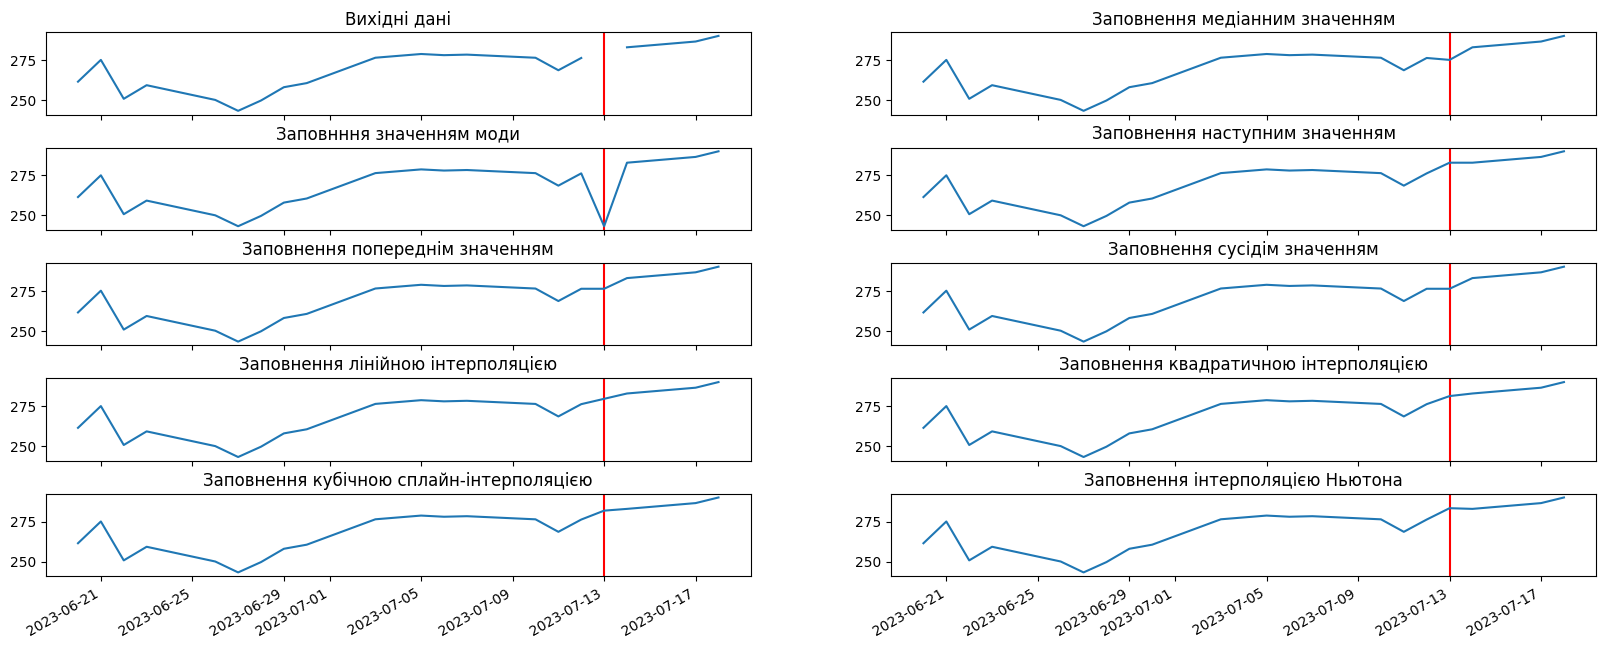

In [ ]:
plt.rcParams['figure.figsize'] = (20, 8)
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10)) = plt.subplots(5, 2)

ax1.set_title('Вихідні дані')
ax1.axvline(x = datetime.datetime.strptime('13072023', '%d%m%Y').date(), color = 'r')
ax1.plot(df['Open'])

ax2.set_title('Заповнення медіанним значенням')
ax2.axvline(x = datetime.datetime.strptime('13072023', '%d%m%Y').date(), color = 'r')
ax2.plot(df['Open'].fillna(df['Open'].median()))

ax3.set_title('Заповнння значенням моди')
ax3.axvline(x = datetime.datetime.strptime('13072023', '%d%m%Y').date(), color = 'r')
ax3.plot(df['Open'].fillna(df['Open'].mode()[0]))

ax4.set_title('Заповнення наступним значенням')
ax4.axvline(x = datetime.datetime.strptime('13072023', '%d%m%Y').date(), color = 'r')
ax4.plot(df['Open'].fillna(method = 'bfill'))

ax5.set_title('Заповнення попереднім значенням')
ax5.axvline(x = datetime.datetime.strptime('13072023', '%d%m%Y').date(), color = 'r')
ax5.plot(df['Open'].interpolate(method = 'pad', limit = 1))

ax6.set_title('Заповнення сусідім значенням')
ax6.axvline(x = datetime.datetime.strptime('13072023', '%d%m%Y').date(), color = 'r')
ax6.plot(df['Open'].interpolate(method = 'nearest', limit = 1))

ax7.set_title('Заповнення лінійною інтерполяцією')
ax7.axvline(x = datetime.datetime.strptime('13072023', '%d%m%Y').date(), color = 'r')
ax7.plot(df['Open'].interpolate(method = 'polynomial', order = 1))

ax8.set_title('Заповнення квадратичною інтерполяцією')
ax8.axvline(x = datetime.datetime.strptime('13072023', '%d%m%Y').date(), color = 'r')
ax8.plot(df['Open'].interpolate(method = 'polynomial', order = 2))

ax9.set_title('Заповнення кубічною сплайн-інтерполяцією')
ax9.axvline(x = datetime.datetime.strptime('13072023', '%d%m%Y').date(), color = 'r')
ax9.plot(df['Open'].interpolate(method = 'cubicspline'))

ax10.set_title('Заповнення інтерполяцією Ньютона')
ax10.axvline(x = datetime.datetime.strptime('13072023', '%d%m%Y').date(), color = 'r')
ax10.plot(df['Open'].fillna(interpolated_VALUE))

fig.autofmt_xdate()
plt.subplots_adjust(hspace = 0.4)

plt.show()

In [ ]:
from scipy.interpolate import lagrange
poly = lagrange(x, y)
print(poly)

       3         2
0.385 x - 4.142 x + 17.41 x + 255


In [ ]:
interpolated_VALUE_lag = np.polynomial.Polynomial(poly.coef[::-1])(interpolation_point)

<ipython-input-70-df687cd3fa88>:19: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ax4.plot(df['Open'].fillna(method = 'bfill'))
<ipython-input-70-df687cd3fa88>:23: FutureWarning: Series.interpolate with method=pad is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ax5.plot(df['Open'].interpolate(method = 'pad', limit = 1))


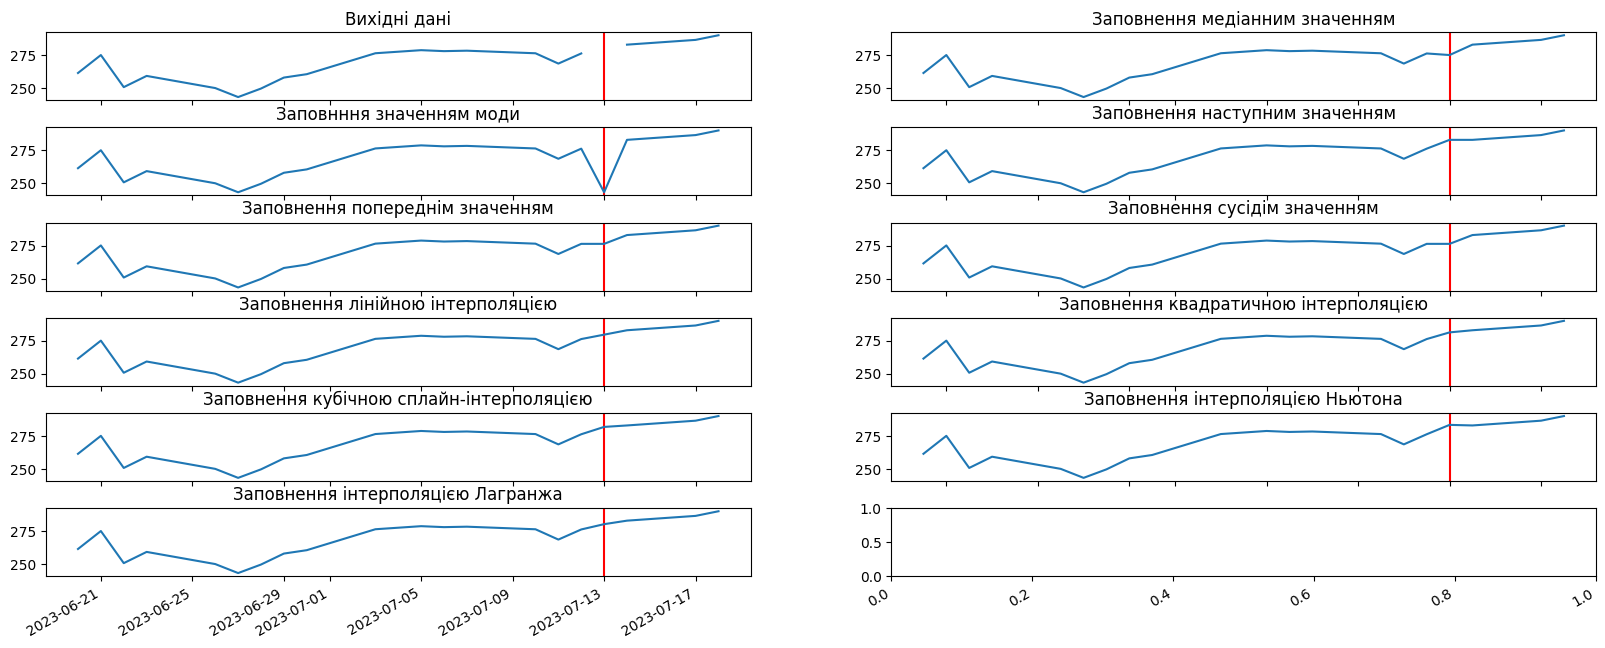

In [ ]:
plt.rcParams['figure.figsize'] = (20, 8)
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10), (ax11, ax12)) = plt.subplots(6, 2)


ax1.set_title('Вихідні дані')
ax1.axvline(x = datetime.datetime.strptime('13072023', '%d%m%Y').date(), color = 'r')
ax1.plot(df['Open'])

ax2.set_title('Заповнення медіанним значенням')
ax2.axvline(x = datetime.datetime.strptime('13072023', '%d%m%Y').date(), color = 'r')
ax2.plot(df['Open'].fillna(df['Open'].median()))

ax3.set_title('Заповнння значенням моди')
ax3.axvline(x = datetime.datetime.strptime('13072023', '%d%m%Y').date(), color = 'r')
ax3.plot(df['Open'].fillna(df['Open'].mode()[0]))

ax4.set_title('Заповнення наступним значенням')
ax4.axvline(x = datetime.datetime.strptime('13072023', '%d%m%Y').date(), color = 'r')
ax4.plot(df['Open'].fillna(method = 'bfill'))

ax5.set_title('Заповнення попереднім значенням')
ax5.axvline(x = datetime.datetime.strptime('13072023', '%d%m%Y').date(), color = 'r')
ax5.plot(df['Open'].interpolate(method = 'pad', limit = 1))

ax6.set_title('Заповнення сусідім значенням')
ax6.axvline(x = datetime.datetime.strptime('13072023', '%d%m%Y').date(), color = 'r')
ax6.plot(df['Open'].interpolate(method = 'nearest', limit = 1))

ax7.set_title('Заповнення лінійною інтерполяцією')
ax7.axvline(x = datetime.datetime.strptime('13072023', '%d%m%Y').date(), color = 'r')
ax7.plot(df['Open'].interpolate(method = 'polynomial', order = 1))

ax8.set_title('Заповнення квадратичною інтерполяцією')
ax8.axvline(x = datetime.datetime.strptime('13072023', '%d%m%Y').date(), color = 'r')
ax8.plot(df['Open'].interpolate(method = 'polynomial', order = 2))

ax9.set_title('Заповнення кубічною сплайн-інтерполяцією')
ax9.axvline(x = datetime.datetime.strptime('13072023', '%d%m%Y').date(), color = 'r')
ax9.plot(df['Open'].interpolate(method = 'cubicspline'))

ax10.set_title('Заповнення інтерполяцією Ньютона')
ax10.axvline(x = datetime.datetime.strptime('13072023', '%d%m%Y').date(), color = 'r')
ax10.plot(df['Open'].fillna(interpolated_VALUE))

ax11.set_title('Заповнення інтерполяцією Лагранжа')
ax11.axvline(x = datetime.datetime.strptime('13072023', '%d%m%Y').date(), color = 'r')
ax11.plot(df['Open'].fillna(interpolated_VALUE_lag))

fig.autofmt_xdate()
plt.subplots_adjust(hspace = 0.4)

plt.show()

Заповніть пропущені значення -  медіаною, попереднім значенням, найближчим сусідом, інтерполяцією Лагранжа

In [ ]:
print(df['Open'].median(), df['Open'].interpolate(method = 'pad', limit = 1)['2023-07-13'], df['Open'].interpolate(method = 'nearest', limit = 1)['2023-07-13'], round(interpolated_VALUE_lag, 2), sep = ', ')

275.13, 276.33, 276.33, 280.35


<ipython-input-73-affe503c0c81>:1: FutureWarning: Series.interpolate with method=pad is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  print(df['Open'].median(), df['Open'].interpolate(method = 'pad', limit = 1)['2023-07-13'], df['Open'].interpolate(method = 'nearest', limit = 1)['2023-07-13'], round(interpolated_VALUE_lag, 2), sep = ', ')
